In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator

#saved to directory
inputDir = '../home/CARD/train/'
outputDir = '../home/CARD/test/'

datagen = ImageDataGenerator(
        brightness_range = [0.7,1.3], 
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range = 0.1,
        rotation_range=45, 
        horizontal_flip=True,  
        vertical_flip=False)


In [16]:
train_data = datagen.flow_from_directory(
                                directory = inputDir,
                                target_size = (256,256),
                                color_mode = 'rgb',
                                save_to_dir=outputDir
                                )

Found 23 images belonging to 2 classes.


In [23]:
seed = 1

train_it = datagen.flow_from_directory('../home/CARD/train/',
                                       save_to_dir = '../home/augmentation/train/',
                                       seed = seed,
                                       target_size=(224, 224),
                                       color_mode='rgb',
                                       class_mode='binary',
                                       batch_size=8)

Found 23 images belonging to 2 classes.


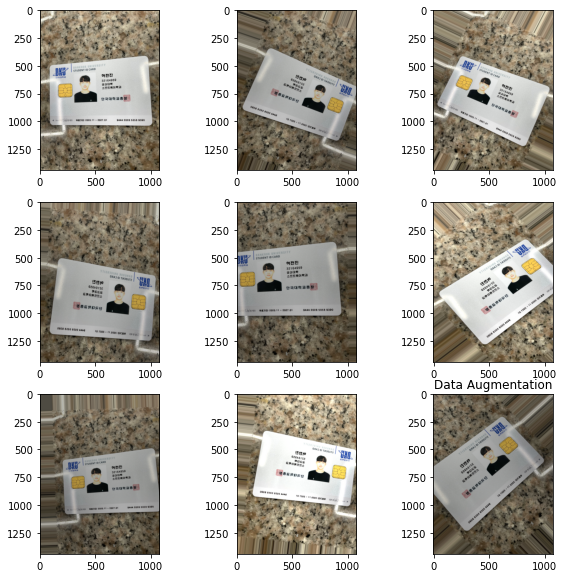

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np



img = load_img('../home/STUDENT_CARD_SAMPLE/1.jpg')
data = img_to_array(img)
samples = np.expand_dims(data, 0)


it = datagen.flow(samples, batch_size=32)

fig = plt.figure(figsize = (10,10))

plt.subplot(3,3,1)
plt.imshow(img)

# 9개 이미지 생성
for i in range(8):
    plt.subplot(3, 3, i+2)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)

# show the figure
plt.title("Data Augmentation")
plt.show()